## Where it Pays to Attend College
### Salaries by college, region, and academic major


Where it Pays to Attend College е dataset-а, на който ще правим data exploration и може да се изтегли от тук:
https://www.kaggle.com/wsj/college-salaries

Данните съдържат информация за заплатите на хората спрямо:
- типа на университета, който са завършили;
- спрямо региона на университета, който са завършили;
- спрямо специалността, която са завършили.

#### Започваме

Инсталираме първоначалните библиотеки:

In [2]:
!pip install numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn

    100% |████████████████████████████████| 542kB 726kB/s ta 0:00:01
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/79/8b/2b/17dcfb9c9b044b216a58daea9787a0637cb1ffc5b4c2a78e50
Successfully built mglearn


Импортваме по-горе инсталираните библиотеки:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

Следващата стъпка е зараждането на dataset-а. Ще използваме pandas.

Зареждаме данните:

In [4]:
college = pd.read_csv("data/college-salaries/salaries-by-college-type.csv")
# region  = pd.read_csv("data/college-salaries/salaries-by-region.csv")
# majors  = pd.read_csv("data/college-salaries/degrees-that-pay-back.csv")

Нека да разгледаме какви данни имаме.

In [5]:
college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [6]:
college.shape

(269, 8)

Нека да видим малко статистика:

In [7]:
college.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,"University of Maryland, College Park",State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


Виждаме, че не всички колони имат стойности - например Mid-Career 10th Percentile Salary. Нека да видим как стои въпросът с другите колони:

In [8]:
college.isnull().sum().sort_values()

School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 10th Percentile Salary    38
Mid-Career 90th Percentile Salary    38
dtype: int64

Нека да видим обща информация за данните, тоест какви колони имаме, техният тип и къде и колко нулеви стойности имаме:

In [9]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB


Като за начало виждаме, че:
1. Данните са непълни. Например имаме някой университет в region, който го няма в college.
2. Типа на данните не е удобен за работа. Например заплатите не са числа.
3. Имената на колоните не са удобни за работа. Например колоната Mid-Career 10th Percentile Salary.

Нека да преименуваме колоните в college сет-а за по-лесна работа с данните.

In [10]:
college

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"
8,Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00"
9,Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00"


Може да видим статистика какви стойности има в колоната и тяхното разпределение:

In [11]:
college['School Type'].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School Type, dtype: int64

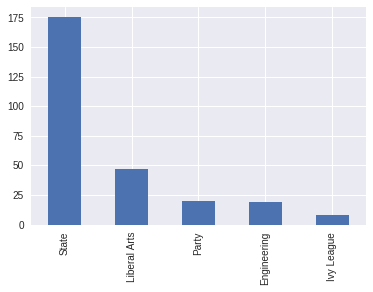

In [12]:
college['School Type'].value_counts().plot(kind="bar")

Нека да преименуваме колоните в college сета.

In [13]:
college_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_median_salary",
    "Mid-Career Median Salary" : "mid_median_salary",
    "Mid-Career 10th Percentile Salary" : "mid_p10_salary",
    "Mid-Career 25th Percentile Salary" : "mid_p25_salary",
    "Mid-Career 75th Percentile Salary" : "mid_p75_salary",
    "Mid-Career 90th Percentile Salary" : "mid_p90_salary"
}

college.rename(columns=college_columns, inplace=True)

college.head()

,name,type,start_median_salary,mid_median_salary,mid_p10_salary,mid_p25_salary,mid_p75_salary,mid_p90_salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


Нека да превърнем колоните със заплатите в числови стойности.

In [14]:
salary_college_columns = [
    "start_median_salary", 
    "mid_median_salary", 
    "mid_p10_salary",
    "mid_p25_salary",
    "mid_p75_salary",
    "mid_p90_salary"
]

for col in salary_college_columns:
    college[col] = college[col].str.replace("$", "")
    college[col] = college[col].str.replace(",", "")
    college[col] = pd.to_numeric(college[col])
    
college

,name,type,start_median_salary,mid_median_salary,mid_p10_salary,mid_p25_salary,mid_p75_salary,mid_p90_salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,67200.0,85200.0,137000.0,183000.0
9,Colorado School of Mines,Engineering,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0


In [15]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
name                   269 non-null object
type                   269 non-null object
start_median_salary    269 non-null float64
mid_median_salary      269 non-null float64
mid_p10_salary         231 non-null float64
mid_p25_salary         269 non-null float64
mid_p75_salary         269 non-null float64
mid_p90_salary         231 non-null float64
dtypes: float64(6), object(2)
memory usage: 16.9+ KB


Нека да видим отново малко статистика, но вече с форматираните данни:

In [16]:
college.describe()

,start_median_salary,mid_median_salary,mid_p10_salary,mid_p25_salary,mid_p75_salary,mid_p90_salary
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


Нека да направим хистограма на стартиращата средна заплата, за да видим какво е разпределението спрямо - брой университети <-> средна заплата.

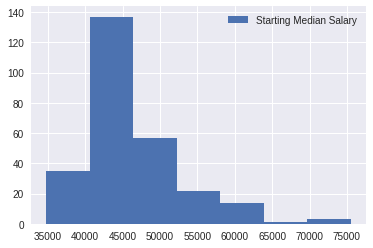

In [21]:
plt.hist(college["start_median_salary"].values, bins=7, label="Starting Median Salary")
plt.legend()
plt.show()

От картинката по-горе се вижда, че предимната средна заплата е в порядъка 40000-45000. Освен това имаме няколко университета, на които кадрите са със средна начална заплата около 70000-75000. Интересно. Най-вероятно това са хората завършили MIT, Harvard и Princeton. Нека да видим:

In [33]:
college.sort_values(by=["start_median_salary"], ascending=False).head(20)

,name,type,start_median_salary,mid_median_salary,mid_p10_salary,mid_p25_salary,mid_p75_salary,mid_p90_salary
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
87,Princeton University,Ivy League,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0
89,Harvard University,Ivy League,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0


Дотук добре. Нека да видим сега как са нещата при средната заплата в средата на кариерата.

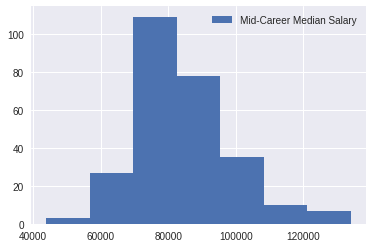

In [29]:
plt.hist(college["mid_median_salary"].values, bins=7, label="Mid-Career Median Salary")
plt.legend()
plt.show()

Тук вече нещата са по-различни. Заплатите са по-високи. Може да видим, че средната заплата, когато вече си натрупил опит и си поработил е около 80000. Не е зле. Нека сега видим дали хората от университетите с висока начална заплата имат и висока заплата след няколко години работа.

In [32]:
college.sort_values(by=["mid_median_salary"], ascending=False).head(20)

,name,type,start_median_salary,mid_median_salary,mid_p10_salary,mid_p25_salary,mid_p75_salary,mid_p90_salary
86,Dartmouth College,Ivy League,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0
87,Princeton University,Ivy League,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
88,Yale University,Ivy League,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0
89,Harvard University,Ivy League,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
90,University of Pennsylvania,Ivy League,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0


Виждаме, че нещата малко са се променили в челните позиции, но като цяло хората завършили Engineering или Ivy League тип на университет имат високи заплати. 

Освен това можем да забележим, че с течение на времето, заплатите се увеличават. Нека да видим това нагледно.

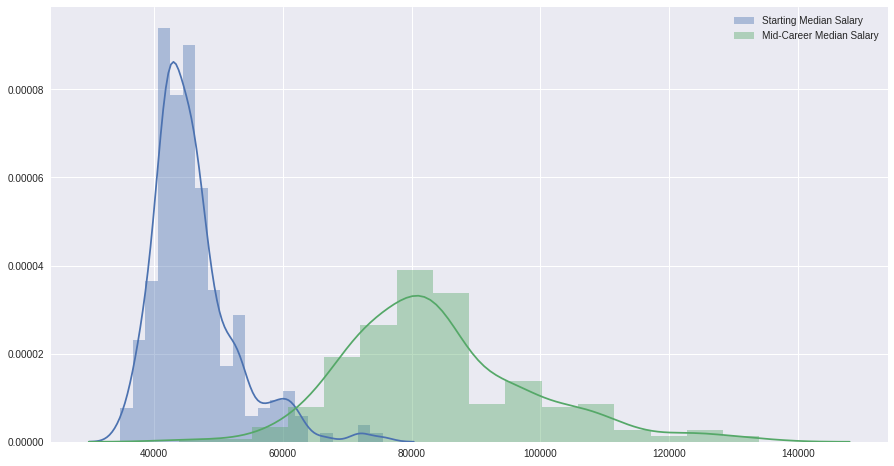

In [34]:
hist_data = [college["start_median_salary"].values, college["mid_median_salary"].values]
group_labels = ["Starting Median Salary", "Mid-Career Median Salary"]

fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(hist_data[0], label=group_labels[0])
sns.distplot(hist_data[1], label=group_labels[1])
plt.legend()

......

TODO: да визуализирам outliers!!!

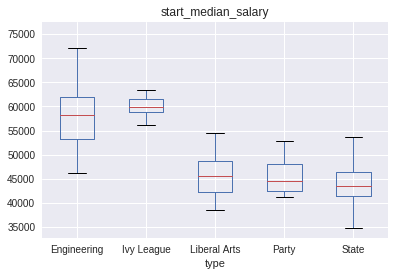

In [41]:
college.boxplot(column="start_median_salary", by="type")
plt.suptitle("")

......

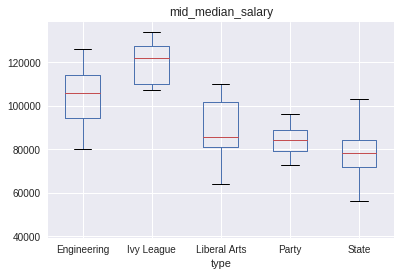

In [42]:
college.boxplot(column="mid_median_salary", by="type")
plt.suptitle("")

....

In [54]:
college["salary_increase"] = college["mid_median_salary"] - college["start_median_salary"]
college["salary_increase"].head()

0    53800.0
1    47500.0
2    50200.0
3    51600.0
4    51800.0
Name: salary_increase, dtype: float64

....

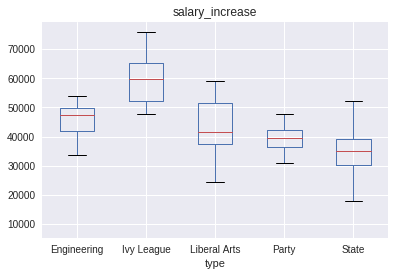

In [56]:
college.boxplot(column="salary_increase", by="type")
plt.suptitle("")